In [1]:
# Dependencies
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from pathlib import Path

/Users/mana/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Data
The dataset can be found and dowloaded from the following link https://www.kaggle.com/datasets/jainaru/adult-income-
census-dataset/data

In [2]:
# Copy the file path to reading 
file = Path(r'Source/adult.csv')

In [3]:
# Reading the CSV file in to the Pandas DataFrame 
df = pd.read_csv(file)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Data Cleaning

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [5]:
# delet the extraneous column that are not related to 
del df['fnlwgt']
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
df['income_binary'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1) 
df.head(2000)

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_binary
0,90,?,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0
2,66,?,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,45,Private,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,15024,0,40,United-States,>50K,1
1996,30,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,35,United-States,>50K,1
1997,40,Self-emp-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,40,United-States,>50K,1
1998,49,Self-emp-inc,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,50,United-States,>50K,1


In [7]:
df.replace("?", pd.NA, inplace=True)

In [8]:
df.dropna(inplace=True)
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_binary
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0
5,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,0
6,38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,0


In [9]:
    
df.shape

(30162, 15)

# Data Description
The dataframe has 30162 rows and 15 columns that represent the Adult Census Income dataset from 1994 US Census Database by Barry Becker. This resouce shows the relation between socio-economic factors and income levels.

In [10]:
# find uniq values of education 
df["education"].unique()

array(['HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-voc',
       '1st-4th', '5th-6th', 'Assoc-acdm', '12th', '9th', 'Preschool'],
      dtype=object)

In [11]:
# find uniq values of occupation
df["occupation"].unique()

array(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Transport-moving', 'Sales',
       'Craft-repair', 'Farming-fishing', 'Tech-support',
       'Protective-serv', 'Handlers-cleaners', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [12]:
# find uniq values of marital status
df["marital.status"].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [13]:
# find uniq values of education.num
df["education.num"].unique()

array([ 9,  4, 10,  6, 16, 15, 13, 14,  7, 11,  2,  3, 12,  8,  5,  1])

In [14]:
df["race"].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [15]:
df.describe()

,age,education.num,capital.gain,capital.loss,hours.per.week,income_binary
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,10.121312,1092.007858,88.372489,40.931238,0.248922
std,13.134665,2.549995,7406.346497,404.298370,11.979984,0.432396
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


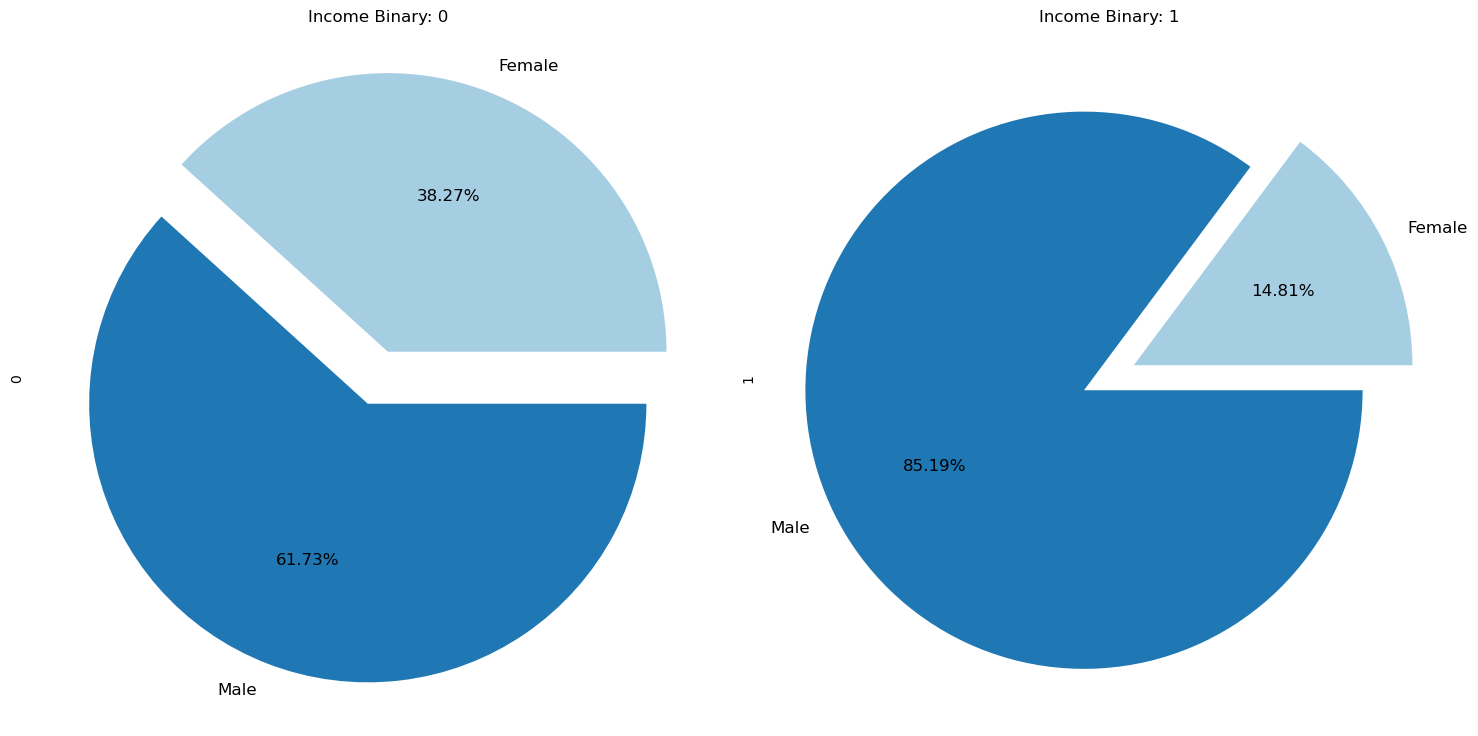

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def pie_chart_income_education(df):
    # Group the data by income_binary and education_num and count the occurrences
    income_education_counts = df.groupby(['income_binary', 'sex']).size().unstack()

    # Define the number of subplots
    num_plots = len(income_education_counts)
    
    # Create subplots
    fig, axes = plt.subplots(1, num_plots, figsize=(15, 8))

    # Ensure axes is a list even if there's only one plot
    if num_plots == 1:
        axes = [axes]
    
    # Colors for the pie chart
    colors = sns.color_palette("Paired")
    
    # Iterate over each category in income_binary
    for ax, (income, counts) in zip(axes, income_education_counts.iterrows()):
        counts.plot(
            kind='pie',
            ax=ax,
            colors=colors,
            autopct='%.2f%%',
            labels=counts.index,
            explode=[0.1] * len(counts),  # Equal explode for all slices
            fontsize=12,
            title=f"Income Binary: {income}"
        )
    
    # Display the plot
    plt.tight_layout()
    plt.show()

# Call the function
pie_chart_income_education(df)


By looking at pie chart we realize that from low Income category , 61.73% are Male and 38.27% are Female comparing to High Income category , which has 85.19% Male and only 14.8 % Female . 

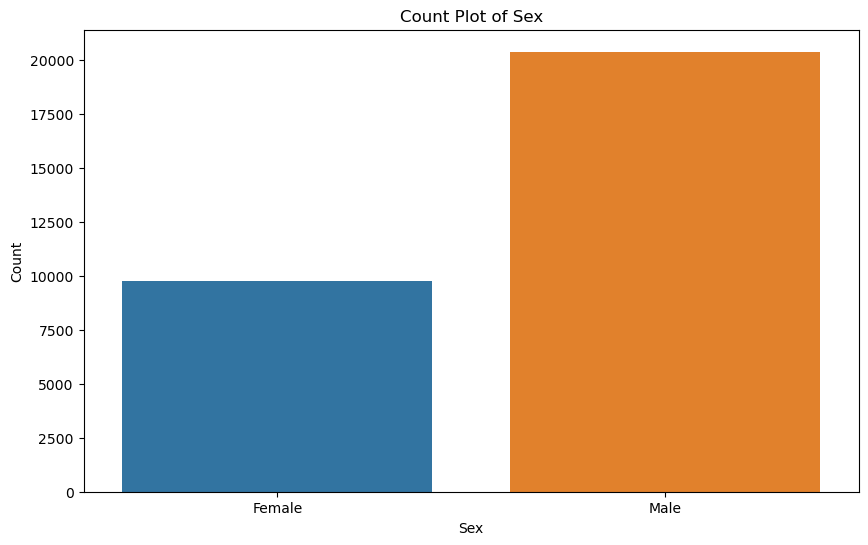

In [17]:
# Count plot of sex
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=df)
plt.title('Count Plot of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Racial or ethnic groups vs Income

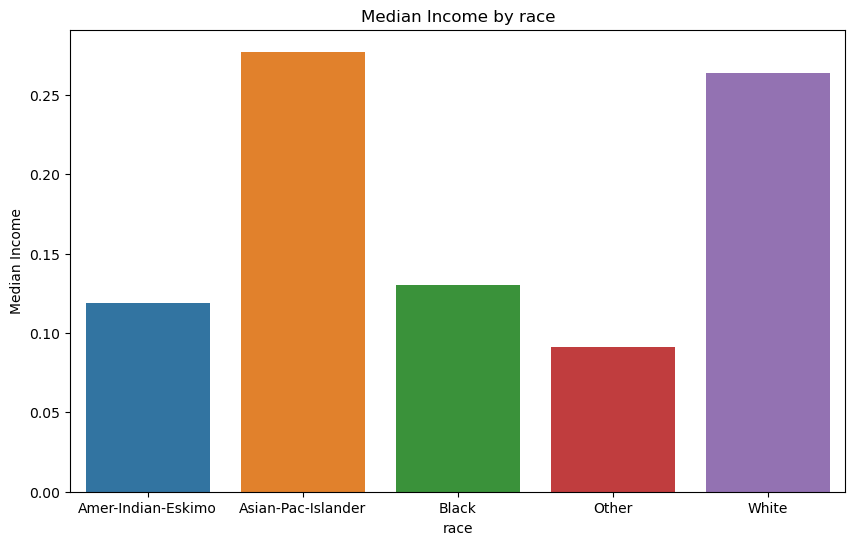

In [18]:
# Allows for the average income for different race groups
avg = df.groupby('race')['income_binary'].mean()
x = avg.index
y = avg.values
plt.figure(figsize=(10, 6))
sns.barplot(x=avg.index, y=avg.values)
plt.xlabel('race')
plt.ylabel('Median Income')
plt.title('Median Income by race')
plt.show()

As we see Asian-Pac-Islander Median income is higher that all other ethnic groups following by Whites.

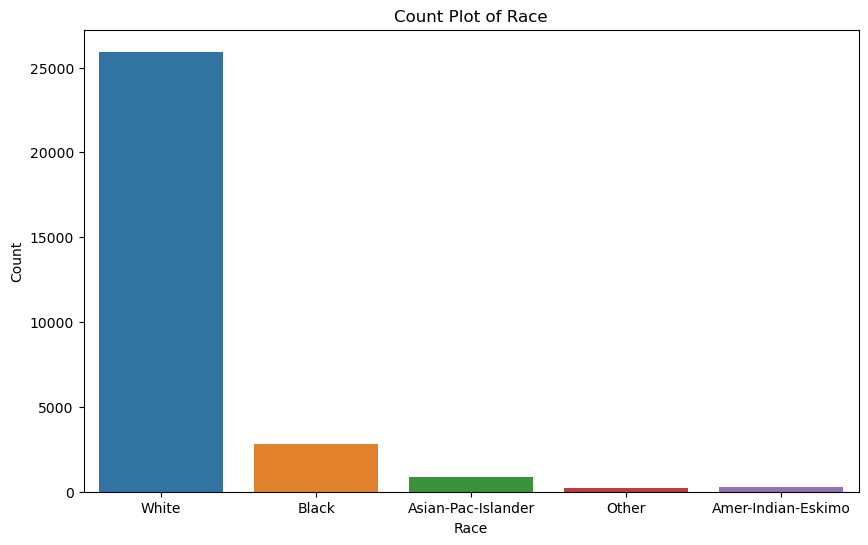

In [19]:
# Count plot of race
plt.figure(figsize=(10, 6))
sns.countplot(x='race', data=df)
plt.title('Count Plot of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

# Relationship between years of education and Income

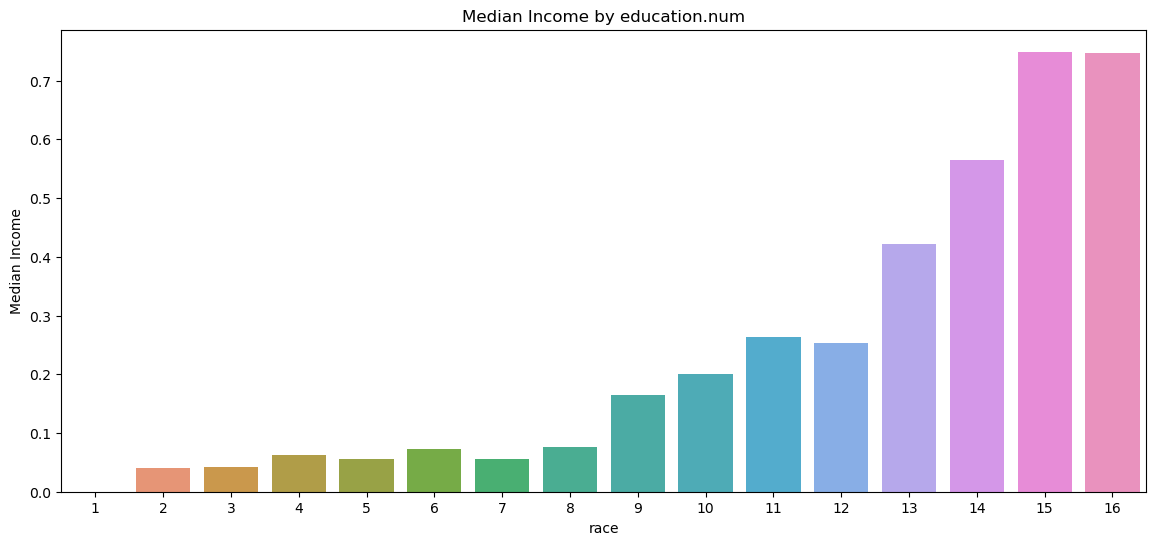

In [20]:
avg = df.groupby('education.num')['income_binary'].mean()
x = avg.index
y = avg.values
plt.figure(figsize=(14, 6))
sns.barplot(x=avg.index, y=avg.values)
plt.xlabel('race')
plt.ylabel('Median Income')
plt.title('Median Income by education.num')
plt.show()

As we see in the bar garph , the higher education years the more Median Income.

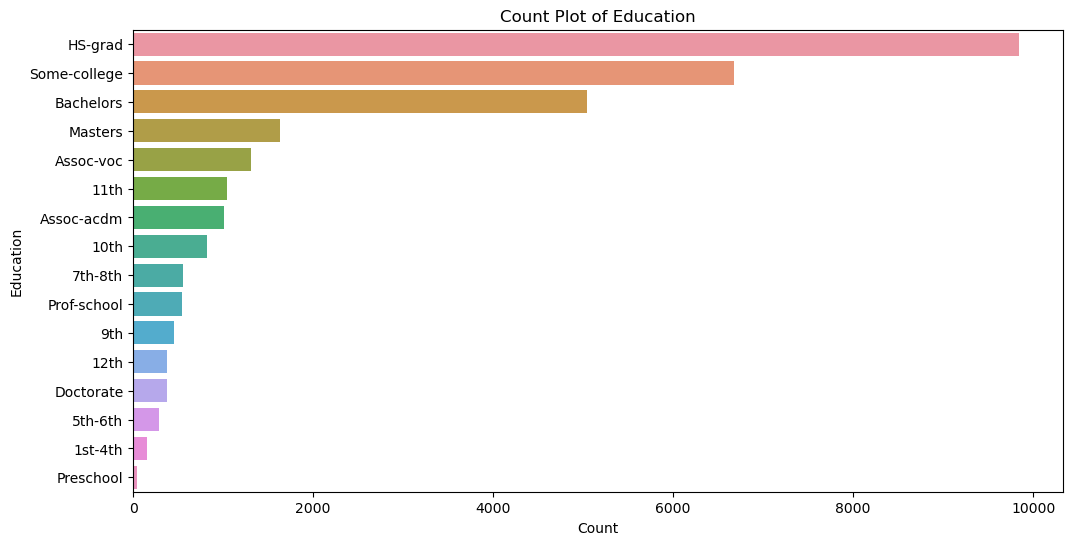

In [21]:
# Count plot of education
plt.figure(figsize=(12, 6))
sns.countplot(y='education', data=df, order=df['education'].value_counts().index)
plt.title('Count Plot of Education')
plt.xlabel('Count')
plt.ylabel('Education')
plt.show()

# Occupation Vs Income

/Users/mana/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mana/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


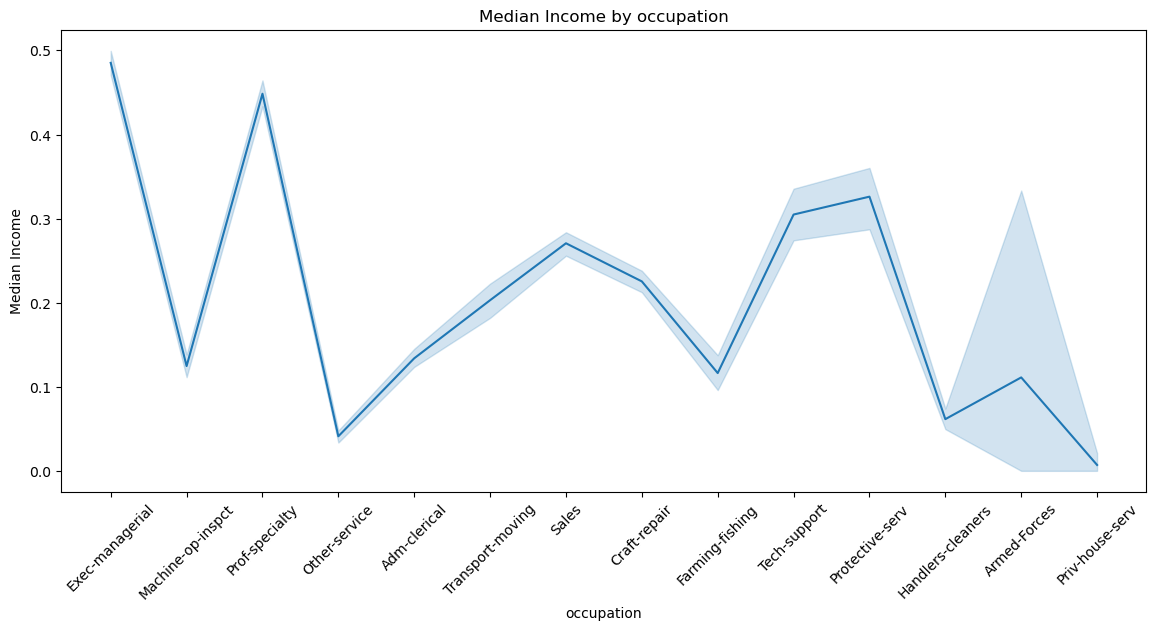

In [22]:
avg = df.groupby('occupation')['income_binary'].mean()
x = avg.index
y = avg.values
plt.figure(figsize=(14, 6))
sns.lineplot(x=df['occupation'], y=df['income_binary'])
plt.xlabel('occupation')
plt.ylabel('Median Income')

plt.xticks(rotation=45)
plt.title('Median Income by occupation')
plt.show()

As line graph shows , ceratin occupations such as Exec_managerial and Profs had the highest Income . 

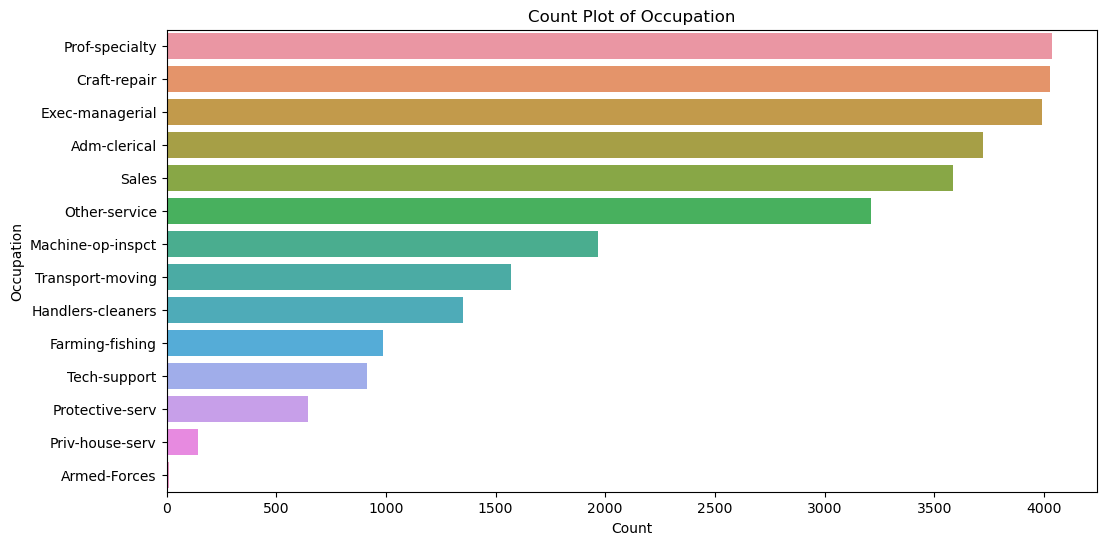

In [23]:
# Count plot of occupation
plt.figure(figsize=(12, 6))
sns.countplot(y='occupation', data=df, order=df['occupation'].value_counts().index)
plt.title('Count Plot of Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

/Users/mana/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


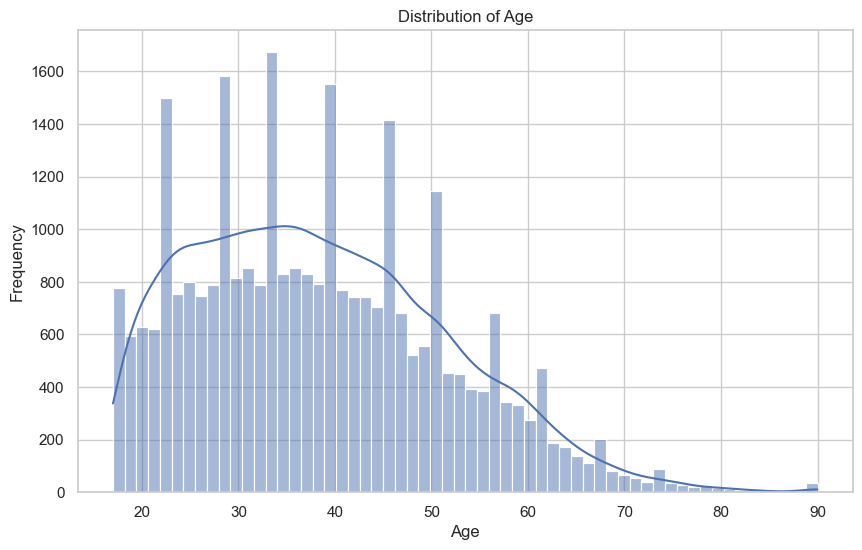

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Income Bracket 

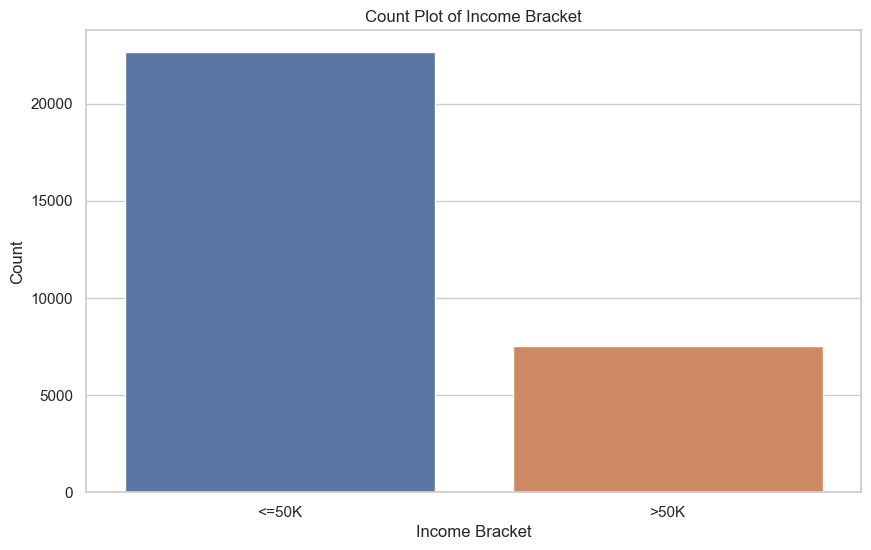

In [25]:

# Count plot of income bracket
plt.figure(figsize=(10, 6))
sns.countplot(x='income', data=df)
plt.title('Count Plot of Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Count')
plt.show()


As the bar graph shows , there are about more than 25000 with the low income (less than $50,000) and around 7000 with high income (more than $50,000). 

# Workclass 

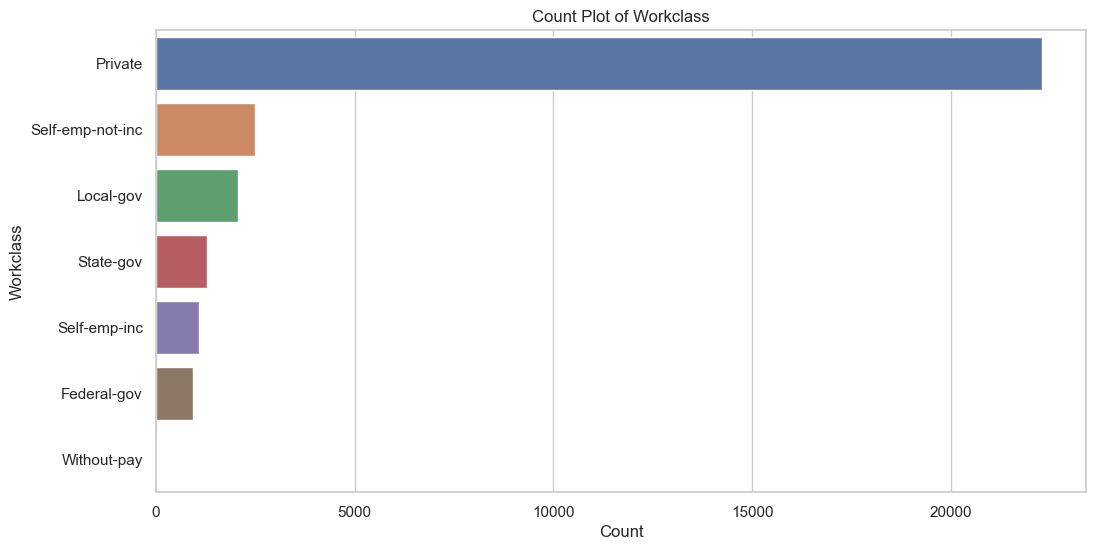

In [26]:
# Count plot of workclass
plt.figure(figsize=(12, 6))
sns.countplot(y='workclass', data=df, order=df['workclass'].value_counts().index)
plt.title('Count Plot of Workclass')
plt.xlabel('Count')
plt.ylabel('Workclass')
plt.show()

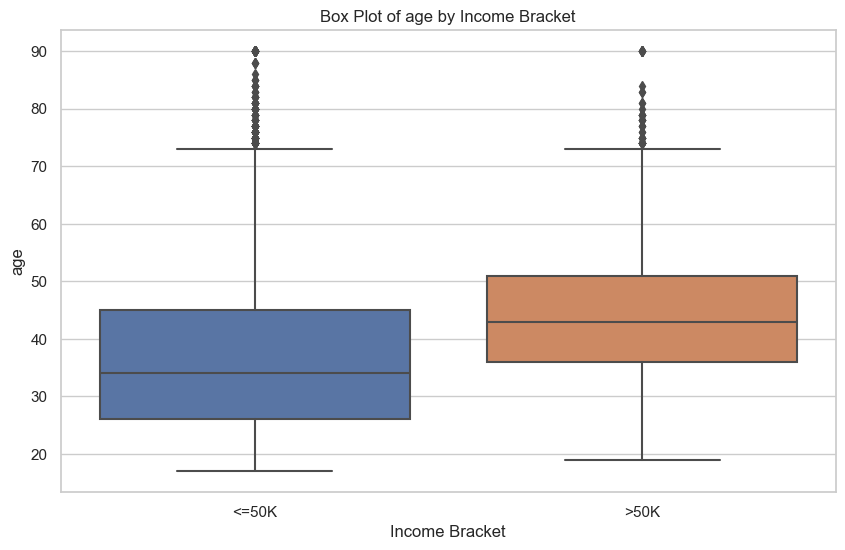

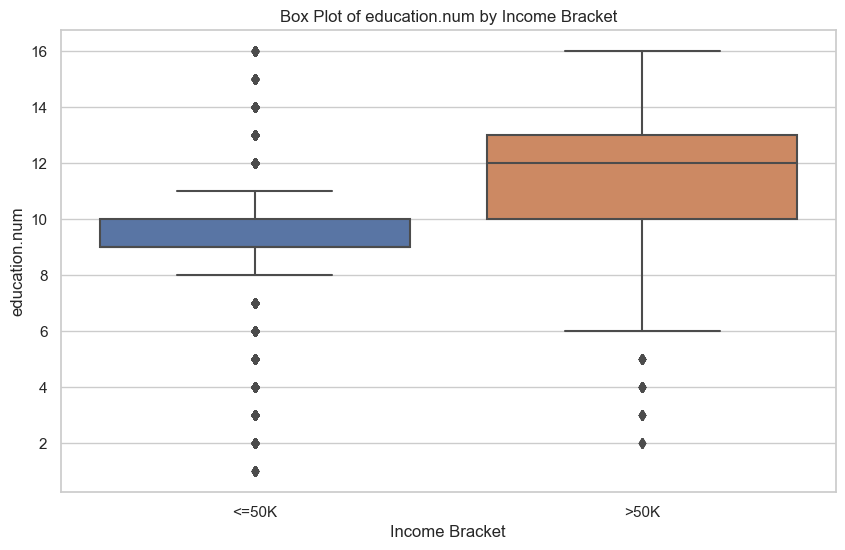

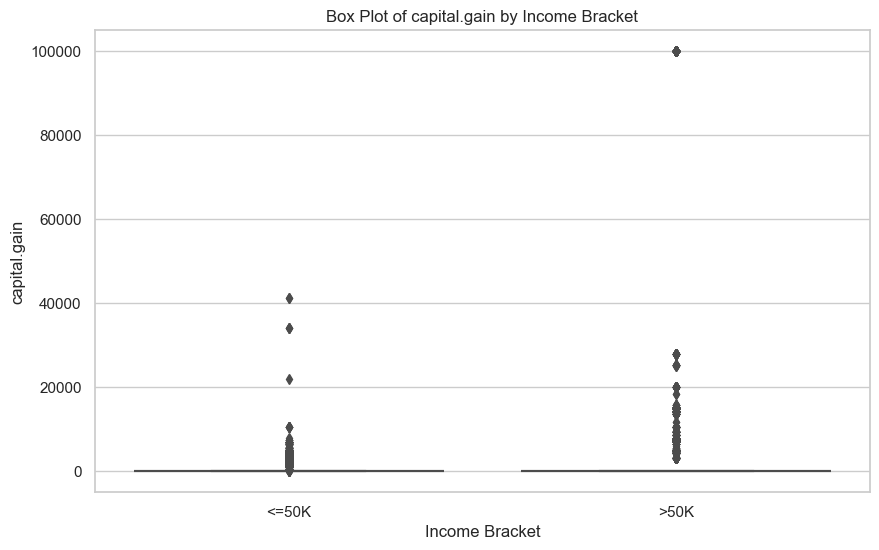

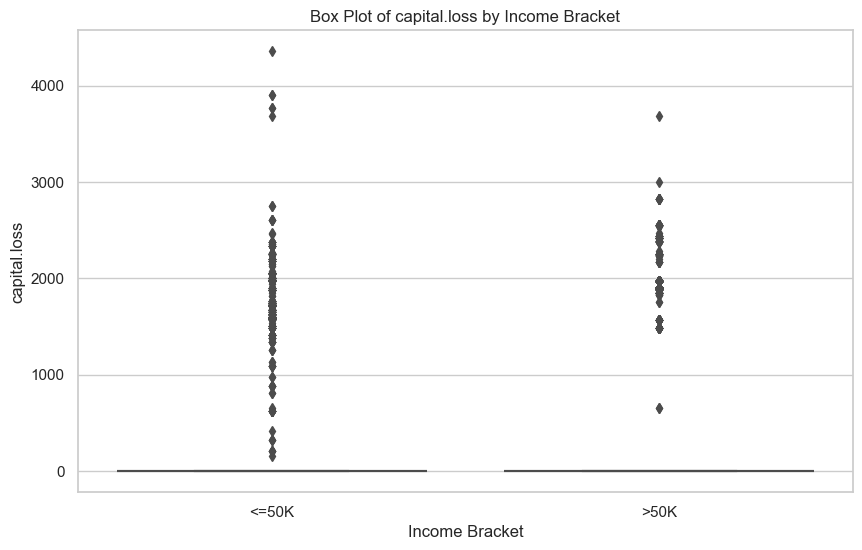

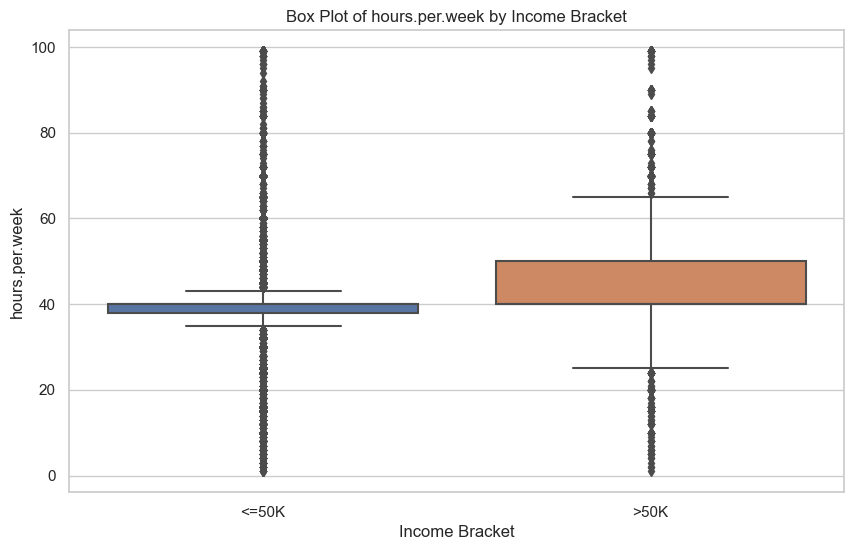

In [27]:
# Box plots for numerical features against income bracket
numerical_features = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='income', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Income Bracket')
    plt.xlabel('Income Bracket')
    plt.ylabel(feature)
    plt.show()

/Users/mana/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mana/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mana/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mana/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

KeyboardInterrupt: 

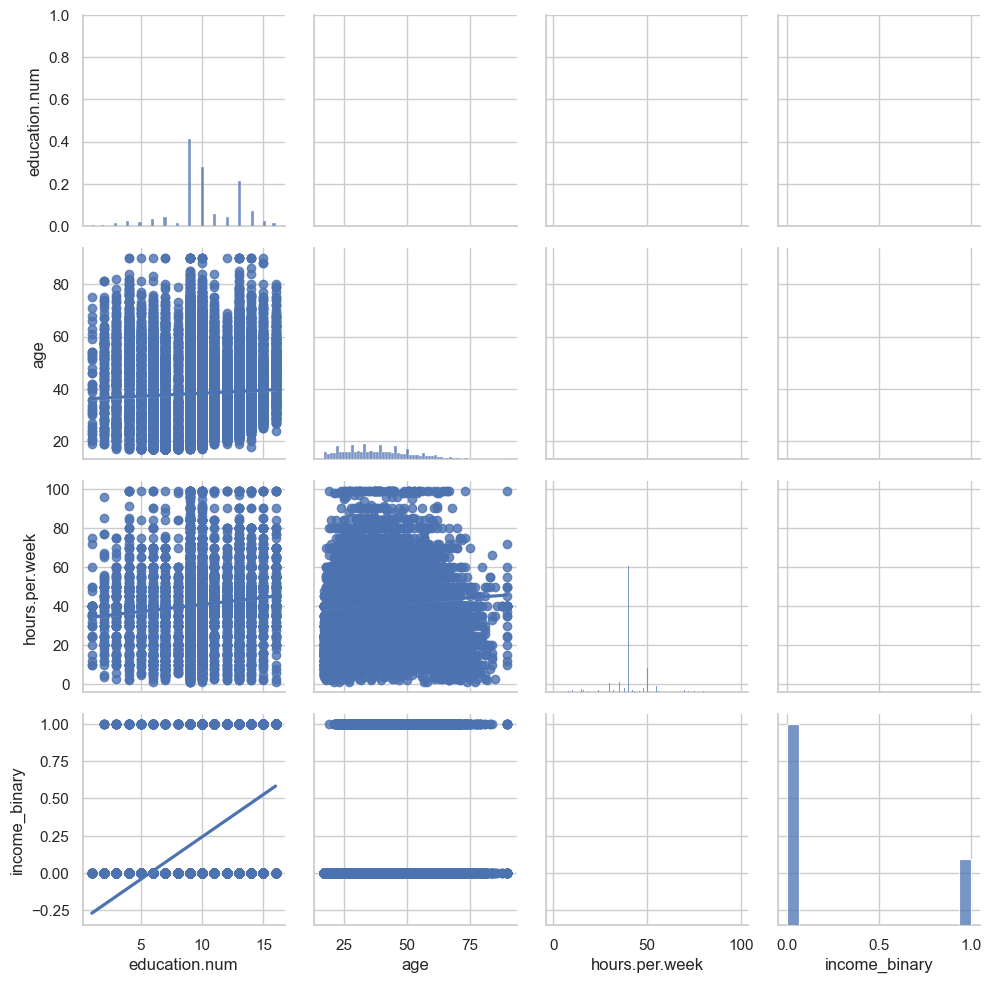

In [28]:
# TYPE OF HOUSE AND CHARACTERISTICS
columns_type=["education.num","age","hours.per.week","income_binary"]
df_house=df[columns_type]

#Plot pairwise relationships in a dataset.
sns.pairplot(df_house, kind='reg')

In [43]:
import pandas as pd
import numpy as np

# Sample data
data = {'race': ['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'],
        'race_number': ['1', '2', '3', '4','5']}

race_df = pd.DataFrame(data)

# Attempt to convert 'Value' column to float, coercing errors to NaN
race_df['race_number'] = pd.to_numeric(race_df['race_number'], errors='coerce')

# Alternatively, you can drop rows with non-numeric 'Value' entries
# df.dropna(subset=['Value'], inplace=True)

print(race_df)

                 race  race_number
0               White            1
1               Black            2
2  Asian-Pac-Islander            3
3               Other            4
4  Amer-Indian-Eskimo            5


In [47]:
race_df['race_number'] = race_df['race_number'].astype(str)

In [48]:
merged_df = race_df.merge(df, left_on='race', right_on='race', how='left')

In [49]:
merged_df.head()

,race,race_number,age,workclass,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_binary
0,White,1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K,0
1,White,1,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K,0
2,White,1,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K,0
3,White,1,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,Female,0,3770,45,United-States,<=50K,0
4,White,1,38,Private,10th,6,Separated,Adm-clerical,Unmarried,Male,0,3770,40,United-States,<=50K,0


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

x = merged_df[['race_number']]  
y = merged_df['income_binary']  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
 
model = LinearRegression()
model.fit(x_train, y_train)

group7_predictions = model.predict(x_test)

x_test = x_test.reset_index(drop=True)

merged_df_subset = merged_df.loc[x_test.index]

dataframe = pd.DataFrame(group7_predictions, columns=['income_binary_prediction'], index=merged_df_subset.index)

predict_val = merged_df_subset.join(dataframe)

predict_val.head(2000)

,race,race_number,age,workclass,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_binary,income_binary_prediction
0,White,1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K,0,0.257545
1,White,1,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K,0,0.257545
2,White,1,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K,0,0.257545
3,White,1,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,Female,0,3770,45,United-States,<=50K,0,0.257545
4,White,1,38,Private,10th,6,Separated,Adm-clerical,Unmarried,Male,0,3770,40,United-States,<=50K,0,0.257545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,White,1,43,Private,HS-grad,9,Never-married,Adm-clerical,Unmarried,Female,8614,0,43,United-States,>50K,1,0.257545
1996,White,1,35,Private,HS-grad,9,Never-married,Adm-clerical,Not-in-family,Male,8614,0,40,United-States,>50K,1,0.257545
1997,White,1,43,Private,Bachelors,13,Separated,Exec-managerial,Unmarried,Male,8614,0,40,United-States,>50K,1,0.257545
1998,White,1,59,Local-gov,Masters,14,Divorced,Prof-specialty,Unmarried,Female,8614,0,60,United-States,>50K,1,0.257545


/Users/mana/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mana/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


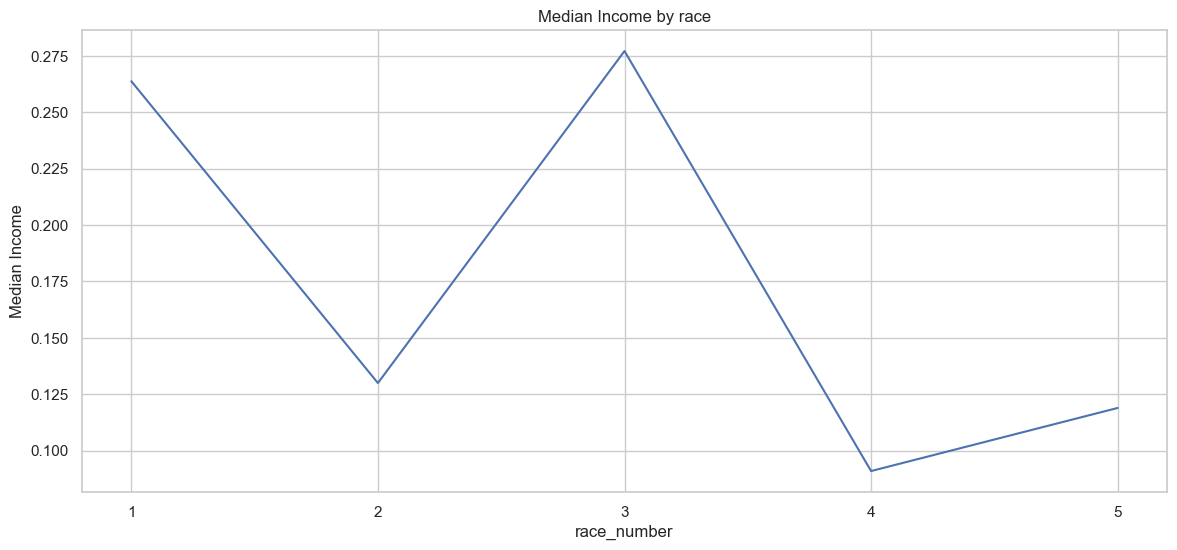

In [53]:
# Allows for the average income for different age groups
avg = merged_df.groupby('race_number')['income_binary'].mean()
x = avg.index
y = avg.values
plt.figure(figsize=(14, 6))
sns.lineplot(x=avg.index, y=avg.values)
plt.xlabel('race_number')
plt.ylabel('Median Income')
plt.title('Median Income by race')
plt.show()

In [ ]:
# # Drop all rows with missing information
# df = df.dropna(how='any')

In [ ]:
# # The Zip column is the wrong data type. It should be a string (object).
# df.dtypes

In [ ]:
# # Use df.astype() method to convert the datatype of the Zip column
# df = df.astype({"Zip": str}, errors='raise')

In [ ]:
# # Verify that the Zip column datatype has been made an object
# df['Zip'].dtype

In [ ]:
# # Clean up Employer category. Replace 'SELF' and 'SELF EMPLOYED' with 'SELF-EMPLOYED'
# df['Employer'] = df['Employer'].replace({'SELF': 'SELF-EMPLOYED', 'SELF EMPLOYED': 'SELF-EMPLOYED'})

In [ ]:
# # Verify clean-up.
# df['Employer'].value_counts()

In [ ]:
# # Clean up Employer category. Replace 'NOT EMPLOYED' with 'UNEMPLOYED'
# df['Employer'] = df['Employer'].replace({'NOT EMPLOYED': 'UNEMPLOYED'})
# df['Employer'].value_counts()

In [ ]:
# # Save the DataFrame to a CSV file. 
# df.to_csv("Resources/donors2021.csv", index=False, encoding="ISO-8859-1")